#### **Latar Belakang**

Transjakarta merupakan angkutan umum massal di Jakarta yang melayani jutaan penumpang setiap harinya. Seiring meningkatnya kebutuhan mobilitas masyarakat, pemerintah memerlukan landasan yang kuat dalam merancang kebijakan transportasi publik yang lebih efisien, adaptif, dan berkelanjutan. Untuk mendukung upaya tersebut, diperlukan landasan berbasis data yang akurat, salah satunya melalui analisis transaksi perjalanan Transjakarta. Data yang tercatat melalui sistem tiket elektronik mampu memberikan gambaran mengenai pola mobilitas masyarakat, perbedaan volume penumpang pada jam sibuk maupun hari libur, serta rute-rute yang paling sering digunakan, sehingga hasil analisisnya dapat menjadi dasar pengambilan keputusan strategis bagi pemerintah dalam meningkatkan kualitas layanan transportasi publik.

---

#### **Rumusan Masalah**

Dalam upaya pemerintah meningkatkan kualitas layanan serta menyusun kebijakan transportasi publik yang lebih efektif dan berkelanjutan, diperlukan analisis berbasis data untuk memahami pola penggunaan Transjakarta sebagai angkutan umum massal. Berdasarkan hal tersebut, untuk mendukung kebutuhan pemerintah dalam pengambilan keputusan, maka sebagai seorang data analyst akan melakukan analisis dengan merumuskan permasalahan sebagai berikut :
1. Siapa saja pengguna Transjakarta?
2. Bagaimana tren jumlah serta pola transaksi penumpang Transjakarta berdasarkan periode waktu?
3. Bagaimana volume transaksi pada setiap koridor?
---

#### **Tujuan dan Manfaat**

Tujuan dari dilakukannya analisis ini adalah:
1. Mengetahui profil pengguna dari Transjakarta.
2. Mengidentifikasi tren jumlah serta pola transaksi penumpang Transjakarta berdasarkan periode waktu.
3. Mengevaluasi volume transaksi pada setiap koridor untuk menemukan jalur dengan permintaan tertinggi dan terendah.

Manfaat dari dilakukannya analisis ini adalah:
1. **Bagi Pemerintah** : mendukung pemerintah dalam melakukan pengambilan keputusan terkait alokasi armada, perencanaan rute, serta kebijakan tarif yang lebih efektif dan efisien untuk semua kalangan pengguna.
2. **Bagi Pengguna Transjakarta** : mendapatkan pengalaman perjalanan yang lebih nyaman dan tepat waktu melalui ketersediaan armada yang sesuai kebutuhan, rute yang lebih terintegrasi, serta pelayanan dengan kualitas tinggi bagi seluruh kelompok usia.
---

In [ ]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

data = pd.read_csv('../Dataset/Transjakarta.csv')

---

#### **Data Understanding**

In [12]:
print(f'Jumlah baris dan kolom pada dataset : {data.shape}')

Jumlah baris dan kolom pada dataset : (37900, 22)


Data yang digunakan dalam analisa ini merupakan Dataset Transaksi Transjakarta yang berisi catatan transaksi perjalanan penumpang selama bulan April 2023 yang terdiri dari **37.900 baris** dan **22 kolom** yang berisi informasi sebagai berikut :

1.	transID: ID transaksi unik untuk setiap transaksi
2.	payCardID: Identitas utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket untuk masuk dan keluar.
3.	payCardBank: Nama bank penerbit kartu pelanggan
4.	payCardName: Nama pelanggan yang tertanam di kartu
5.	payCardSex: Jenis kelamin pelanggan yang tertanam di kartu
6.	payCardBirthDate: Tahun lahir pelanggan
7.	corridorID: ID koridor / ID rute sebagai kunci untuk pengelompokan rute
8.	corridorName: Nama koridor / Nama rute yang memuat titik awal dan akhir setiap rute
9.	direction: 0 untuk Pergi, 1 untuk Pulang. Arah perjalanan rute
10.	tapInStops: ID halte masuk (tap in) untuk mengidentifikasi nama halte
11.	tapInStopsName: Nama halte masuk (tap in) tempat pelanggan melakukan tap in
12.	tapInStopsLat: Garis lintang (latitude) halte tap in
13.	tapInStopsLon: Garis bujur (longitude) halte tap in
14.	stopStartSeq: Urutan halte, halte pertama, halte kedua, dst. Terkait dengan arah perjalanan
15.	tapInTime: Waktu tap in. Tanggal dan jam
16.	tapOutStops: ID halte keluar (tap out) untuk mengidentifikasi nama halte
17.	tapOutStopsName: Nama halte keluar (tap out) tempat pelanggan melakukan tap out
18.	tapOutStopsLat: Garis lintang (latitude) halte tap out
19.	tapOutStopsLon: Garis bujur (longitude) halte tap out
20.	stopEndSeq: Urutan halte, halte pertama, halte kedua, dst. Terkait dengan arah perjalanan
21.	tapOutTime: Waktu tap out. Tanggal dan jam
22.	payAmount: Jumlah yang dibayarkan pelanggan. Beberapa gratis, beberapa berbayar.

Setiap baris merepresentasikan satu perjalanan penumpang yang terekam melalui sistem tiket elektronik, dengan informasi utama seperti waktu tap-in dan tap-out, kode koridor yang digunakan, serta data demografis sederhana berupa tahun lahir pemilik kartu.

Berikut 5 baris teratas dari dataset Transjakarta :

In [4]:
data.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


Untuk memperdalam pemahaman mengenai dataset ini, dilakukan eksplorasi awal terhadap struktur dan karakteristik data sebagai berikut :

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [21]:
display(data.describe(), data.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [26]:
listItem = []
for col in data.columns :
    listItem.append( [col, data[col].nunique(), data[col].unique()])

unique = pd.DataFrame(columns=['Column Name', 'Total Unique', 'Unique Sample'],
                     data=listItem)
unique

,Column Name,Total Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana, S.H

In [24]:
# Jumlah missing value

missing_data = pd.DataFrame({
    "Jumlah Missing": data.isna().sum(),
    "Persentase Missing (%)": (data.isna().sum()/len(data)*100).round(2)
})

display(missing_data)

,Jumlah Missing,Persentase Missing (%)
transID,0,0.00
payCardID,0,0.00
payCardBank,0,0.00
payCardName,0,0.00
payCardSex,0,0.00
payCardBirthDate,0,0.00
corridorID,1257,3.32
corridorName,1930,5.09
direction,0,0.00
tapInStops,1213,3.20


<Axes: >

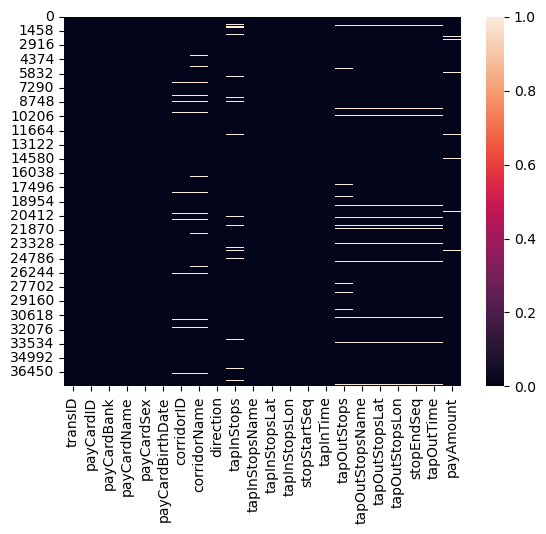

In [31]:
sns.heatmap(data[['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount']].isna())

Berdasarkan eksplorasi data tersebut, dapat diketahui bahwa :

1. Struktur Data
	- Berdasarkan hasil eksplorasi awal dengan fungsi data.info(), dataset Transjakarta terdiri dari **37.900 baris** dan **22 kolom**.
	- Tipe data yang digunakan meliputi:
		- object (data kategorikal atau string)
		- int64 (bilangan bulat)
		- float64 (bilangan desimal)
	- Kolom-kolom yang tersedia mencakup:
		- Identitas pelanggan: payCardID, payCardBank, payCardName, payCardSex, payCardBirthDate.
		- Informasi perjalanan: corridorID, corridorName, direction.
		- Lokasi perjalanan: tapInStops, tapOutStops, tapInStopsLat, tapInStopsLon, tapOutStopsLat, tapOutStopsLon.
		- Urutan pemberhentian: stopStartSeq, stopEndSeq.
		- Waktu perjalanan: tapInTime, tapOutTime.
		- Informasi pembayaran: payAmount.

2. Statistik Deskriptif
	- Kolom numerik:
		- payAmount memiliki nilai rata-rata Rp2.699 dengan nilai maksimum Rp200.000
		- payCardBirthDate berkisar antara tahun 1946–2012, menunjukkan rentang usia pelanggan yang luas
		- direction bernilai 0 dan 1 (pergi/pulang)
	- Kolom kategorikal:
		- payCardBank terdiri dari 6 bank penerbit, dengan dominasi bank “dki”
		- payCardSex terbagi 2 kategori, mayoritas perempuan
		- corridorName memiliki 216 variasi nama rute, salah satunya “Cibubur - Balai Kota”.
		- payCardName terdapat hampir 2.000 variasi unik, dengan nama terbanyak “Fathonah Saefullah”

3. Nilai Unik
	- Kolom transID terdiri dari 37.900 data unique, yang artinya tidak ada data transaksi yang duplikat pada dataset ini.
	- corridorID memiliki 221 variasi unik.
	- tapInStops sebanyak 2.570 variasi dan tapInStopsName sebanyak 2.602 variasi.
	- tapOutStops sebanyak 2.230 variasi dan tapOutStopsName sebanyak 2.248 variasi.
	- payCardName memiliki 1.993 variasi unik.

4. Missing Value
	- Beberapa kolom memiliki nilai kosong dengan proporsi:
		- corridorID = 1.257 (3,32%)
		- corridorName = 1.930 (5.09%)
		- tapInStops = 1.213 (3,20%)
		- tapOutStops = 2.289 (6,26%)
		- tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime = 1.344 (3,55%)
		- payAmount = 1.007 (2,66%)
	- Visualisasi distribusi missing value menggunakan heatmap dengan keterangan:
		- Sumbu X = kolom dataset
		- Sumbu Y = index/baris data
		- Warna gelap (hitam) = data tersedia
		- Warna terang (putih) = missing value (NaN)
	- Berdasarkan hasil visualisasi distribusi missing value tersebut dapat disimpulkan :
		- Missing values tidak terkonsentrasi hanya pada satu bagian dataset, melainkan tersebar di berbagai baris
		- Adanya keterkaitan data tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, dan tapOutTime yang cenderung hilang secara bersamaan ketika data tapOutStops tidak tercatat.
		- Adanya keterkaitan data corridorID dan corridorName yang cenderung hilang secara bersamaan ketika data corridorID tidak tercatat, meskipun beberapa data corridorName ada yang hilang ketika data corridorID tersedia.



---

### **Data Cleaning**

Berdasarkan hasil ekplorasi data, untuk memastikan bahwa dataset yang digunakan bersih, konsisten, dan siap dianalisis maka perlu dilakukannya data cleaning dengan menerapkan beberapa proses berikut :
1. Melakukan perubahan terhadap tipe data yang tidak sesuai.
2. Menangani setiap missing value agar tidak menimbulkan bias dalam analisis.



**1. Perubahan Tipe Data**

Hasil ekplorasi data menunjukkan bahwa tipe data pada kolom tapInTime dan tapOutTime berupa *object*, sehingga perlu dikonversi menjadi tipe data datetime agar sesuai dengan karakteristik data waktu dan mendukung analisis yang lebih akurat.

In [87]:
data['tapInTime'] = pd.to_datetime(data['tapInTime'])
data['tapOutTime'] = pd.to_datetime(data['tapOutTime'])

data.dtypes[['tapInTime', 'tapOutTime']]

tapInTime     datetime64[ns]
tapOutTime    datetime64[ns]
dtype: object

**2. Penanganan Missing Values**

Hasil eksplorasi data menunjukkan bahwa terdapat 10 kolom dengan missing value yang berkisar antara **2,66-6,04%**. Data missing value ini tergolong kecil yang tidak akan mempengaruhi analisa terhadap data, sehingga untuk menangani missing value ini dapat dilakukan penghapusan pada baris yang memiliki missing value.

In [88]:
data.dropna(inplace=True)
data.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [85]:
# Menyimpan data yang sudah bersih ke dalam file .csv

data.to_csv('../Dataset/new_Transjakarta.csv', index=False)

---

### **Exploratory Data Analysis (EDA) and Visualization**

Setelah melalui tahap data cleaning, langkah berikutnya adalah melakukan Exploratory Data Analysis (EDA) untuk memahami lebih dalam pola dan karakteristik penggunaan Transjakarta. Analisis ini bertujuan untuk menjawab berbagai pertanyaan terkait tren perjalanan, profil penumpang, distribusi waktu, hingga perbandingan volume antar koridor.

EDA dilakukan dengan pendekatan deskriptif menggunakan tabel ringkasan statistik serta berbagai visualisasi, sehingga pola data dapat terlihat lebih jelas. Fokus utama analisis ini meliputi:
- Profil pengguna, untuk mengetahui distribusi umur dari pengguna Transjakarta.
- Tren waktu, dengan melihat perkembangan jumlah transaksi per hari dan per bulan.
- Koridor atau rute, untuk menentukan jalur dengan volume transaksi tertinggi maupun terendah.

Dengan pendekatan ini, diharapkan analisis dapat memberikan gambaran komprehensif mengenai perilaku pengguna Transjakarta. Insight yang diperoleh akan bermanfaat dalam mendukung pengambilan keputusan operasional serta penyusunan kebijakan transportasi publik yang lebih efektif dan berkelanjutan.

***Profil Pengguna* : Siapa saja pengguna Transjakarta?**

Untuk mengetahui karakteristik pengguna Transjakarta, analisis diawali dengan melihat distribusi gender dari pengguna Transjakarta.

,payCardSex,total
0,F,16939
1,M,14791


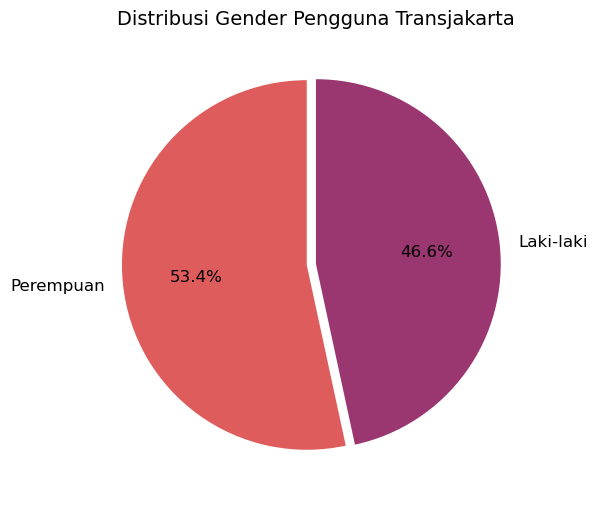

In [354]:
gender = data[['payCardSex']].groupby('payCardSex').value_counts().reset_index(name='total')

display(gender)

labels = ['Perempuan', 'Laki-laki']
colors = sns.color_palette("flare", 2)
explode = (0.05, 0) 

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, textprops={'fontsize': 12})
plt.title("Distribusi Gender Pengguna Transjakarta", fontsize=14)
plt.show()

Berdasarkan pie chart, dapat dilihat bahwa pengguna Transjakarta lebih didominasi oleh **Perempuan** sebesar 53.4%, sedangkan **Laki-laki** sebesar 46.6% dari total seluruh pengguna Transjakarta.

Kemudian dilakukan analisa terhadap distribusi umur pengguna Transjakarta. Analisis ini dapat dilakukan melalui perhitungan statistik deskriptif yang ditampilkan dalam tabel, serta divisualisasikan menggunakan histogram dan boxplot berikut:

In [334]:
# Ubah Tahun Menjadi Umur

current_year = datetime.datetime.now().year

data['age'] = current_year - data['payCardBirthDate']

# Analisa Statistik Deskriptif terhadap Umur

min_age = data['age'].min()
max_age = data['age'].max()
median_age = data['age'].median()
mean_age = data['age'].mean().round()
mode_age = data['age'].mode()[0] 

summary = pd.DataFrame({
    "Min": [min_age],
    "Max": [max_age],
    "Median": [median_age],
    "Mean": [mean_age],
    "Mode": [mode_age]
})

display(summary)

,Min,Max,Median,Mean,Mode
0,13,79,34.0,35.0,33


Berdasarkan hasil perhitungan deskriptif terhadap variabel umur penumpang Transjakarta, diperoleh informasi bahwa pengguna termuda tercatat berusia 13 tahun. Hal ini menunjukkan bahwa layanan Transjakarta telah diakses oleh kelompok pelajar sekolah menengah. Sementara itu, pengguna tertua mencapai usia 79 tahun, yang menandakan keberadaan segmen lansia meskipun jumlahnya relatif kecil. Nilai median umur pengguna berada di kisaran 34 tahun, sedangkan rata-rata umur sebesar 34,8 tahun dengan modus pada umur 33 tahun. Keseluruhan hasil ini menunjukkan bahwa distribusi umur relatif simetris, tanpa adanya penyimpangan ekstrem yang mendominasi.

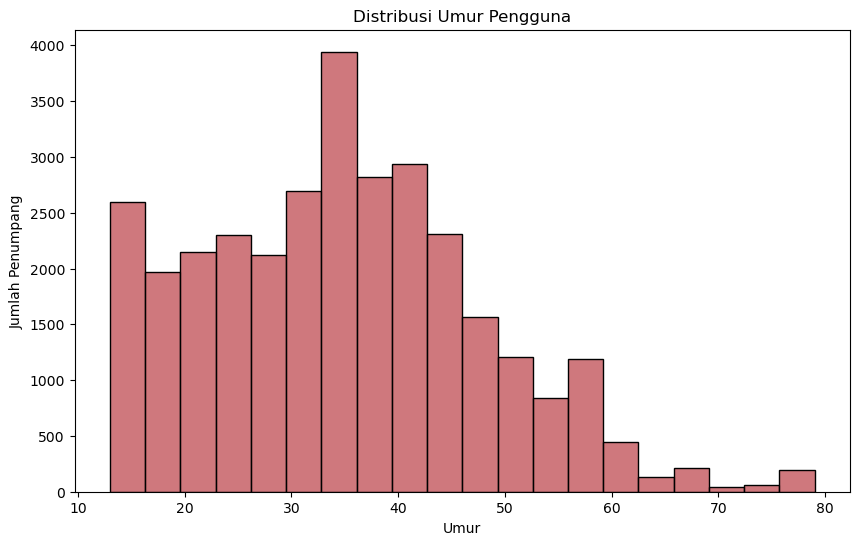

In [370]:
plt.figure(figsize=(10,6))
sns.histplot(data['age'], bins=20, color="#bf4b52")
plt.title("Distribusi Umur Pengguna")
plt.xlabel("Umur")
plt.ylabel("Jumlah Penumpang")
plt.show()

Hasil visualisasi melalui histogram memperlihatkan bahwa distribusi umur penumpang Transjakarta membentuk pola dengan puncak pada rentang usia 29 hingga 43 tahun. Rentang ini merepresentasikan kelompok usia produktif yang menjadi pengguna utama layanan transportasi publik ini. Selain itu, terdapat jumlah pengguna yang cukup besar pada kelompok usia ≤25 tahun, yang menunjukkan bahwa banyak pelajar dan mahasiswa memanfaatkan Transjakarta untuk aktivitas harian seperti sekolah maupun kuliah. Setelah usia 45 tahun, jumlah penumpang mulai mengalami penurunan signifikan, dan hanya sebagian kecil pengguna yang berasal dari kelompok usia lanjut. Meskipun demikian, masih ditemukan pengguna dengan usia di atas 70 tahun, yang mengindikasikan bahwa Transjakarta juga digunakan oleh lansia walaupun dalam proporsi kecil.

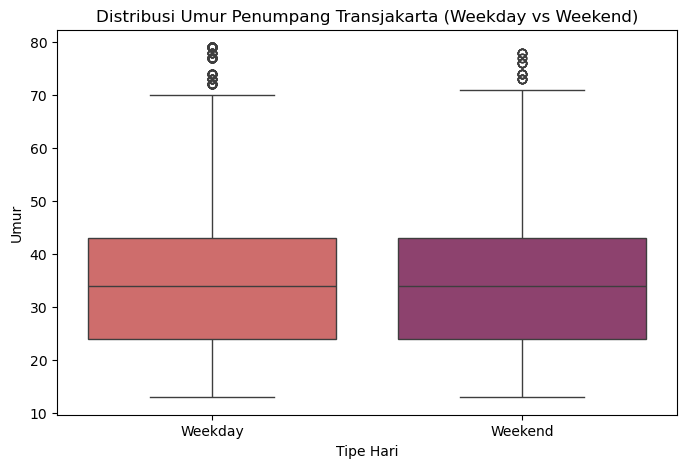

In [252]:
plt.figure(figsize=(8,5))
sns.boxplot(x='day_type', y='age', data=data, hue='day_type', palette="flare")

plt.title("Distribusi Umur Penumpang Transjakarta (Weekday vs Weekend)")
plt.xlabel("Tipe Hari")
plt.ylabel("Umur")
plt.show()

Selanjutnya, hasil visualisasi dengan boxplot yang membandingkan distribusi umur berdasarkan kategori weekday dan weekend menunjukkan bahwa karakteristik umur pengguna relatif konsisten sepanjang minggu. Median umur pada kedua kategori berada di kisaran 33–34 tahun, dengan rentang interkuartil (IQR) yang hampir sama, yaitu mayoritas pengguna berusia antara 20 hingga 40 tahun. Outlier juga terdeteksi pada kelompok usia <15 tahun yang mengindikasikan adanya pelajar, serta kelompok usia >70 tahun yang menunjukkan keberadaan pengguna lansia. Namun, perbedaan distribusi umur antara weekday dan weekend tidak signifikan, sehingga dapat disimpulkan bahwa variasi jumlah transaksi lebih dipengaruhi oleh perbedaan hari, bukan oleh karakteristik umur pengguna.

Secara keseluruhan, analisis distribusi umur ini memperlihatkan bahwa kelompok usia produktif (20–40 tahun) merupakan pengguna utama Transjakarta, diikuti oleh pelajar (<25 tahun) sebagai segmen penting khususnya pada hari kerja. Segmen lansia (>60 tahun) memang relatif kecil, tetapi tetap eksis sebagai bagian dari pengguna. Oleh karena itu, implikasi kebijakan transportasi publik sebaiknya tidak hanya berfokus pada penumpang usia produktif, melainkan juga mempertimbangkan keberadaan pelajar dan lansia melalui kebijakan tarif khusus maupun peningkatan aksesibilitas fasilitas.

***Tren Waktu* : Bagaimana tren dan pola transaksi penumpang berdasarkan periode waktu?**

Kemudian untuk memahami pola transaksi berdasarkan waktu, dilakukan analisis menggunakan beberapa visualisasi. Analisis ini mencakup tren transaksi harian sepanjang bulan April 2023 yang divisualisasikan dengan line chart, distribusi transaksi per hari dalam seminggu menggunakan bar chart, serta pola perjalanan harian berdasarkan kombinasi hari dan jam dengan heatmap berikut:


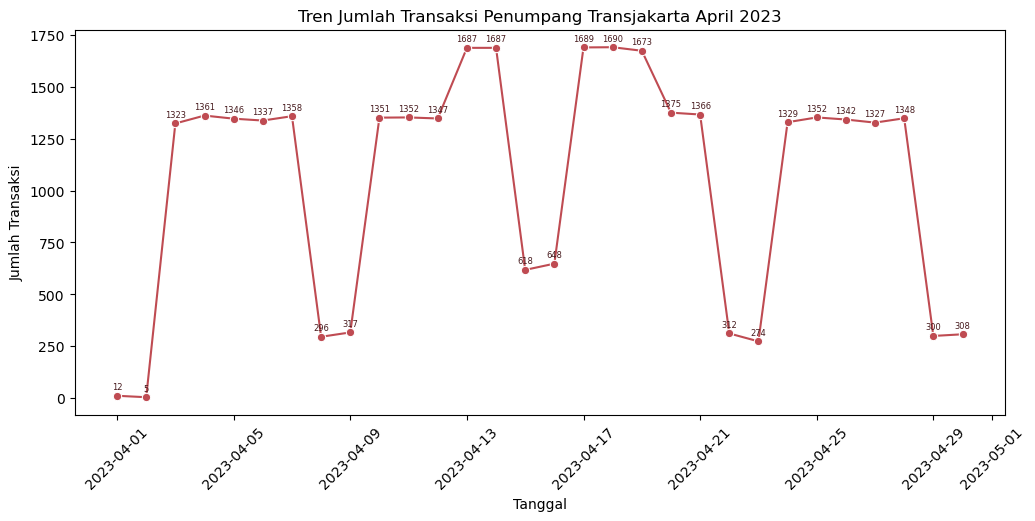

In [263]:
daily_trend = data.groupby(data['tapInTime'].dt.date).size()

plt.figure(figsize=(12,5))
sns.lineplot(x=daily_trend.index, y=daily_trend.values, marker='o', color='#bf4b52')

for x, y in zip(daily_trend.index, daily_trend.values):
    plt.text(x, y+30, str(y), ha='center', fontsize=6, color="#461a1d")
    
plt.title("Tren Jumlah Transaksi Penumpang Transjakarta April 2023")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

Berdasarkan line chart transaksi penumpang Transjakarta pada bulan April 2023, terlihat adanya pola transaksi yang fluktuatif dengan kisaran transaksi harian antara 12 hingga 1.690 transaksi.

- Transaksi paling rendah berada pada awal bulan yaitu tanggal 1 dan 2 April 2023, dengan total transaksi sebesar 12 pada tanggal 1 dan 5 pada tanggal 2.
- Setelah itu, transaksi meningkat stabil dengan rentang 1.323 hingga 1.690 transaksi per hari mulai dari 3 April hingga 28 April 2023, yang mencerminkan kondisi operasional normal dan tingginya aktivitas penumpang.
- Puncak aktivitas tertinggi terjadi pada periode 13–20 April 2023, ketika transaksi harian konsisten berada di atas 1.600 transaksi dan mencapai puncaknya pada 17 April 2023 dengan 1.690 transaksi.
- Meskipun secara umum stabil, dalam rentang tersebut terdapat beberapa hari yang mengalami penurunan signifikan hingga di bawah 650 transaksi per hari, yakni pada tanggal 8–9 April, 21–23 April, serta menjelang akhir bulan pada 29–30 April 2023.

Pola ini menunjukkan bahwa meskipun transaksi harian cenderung stabil di pertengahan bulan, terdapat momen tertentu dengan penurunan tajam yang kemungkinan dipengaruhi oleh faktor eksternal seperti akhir pekan atau hari libur.

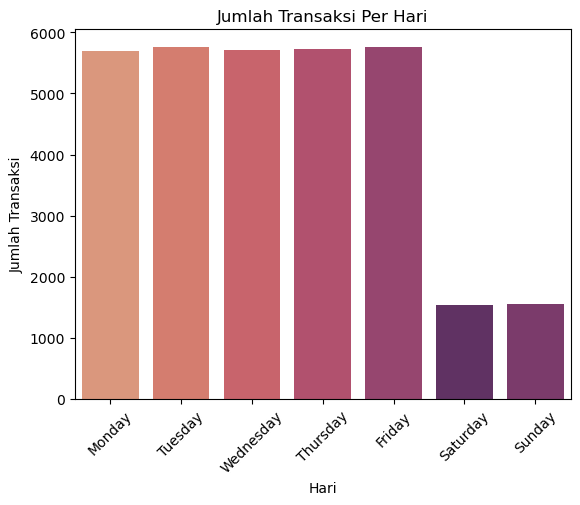

In [329]:
# Menambah Kolom Nama Hari
data['weekday'] = data['tapInTime'].dt.day_name()

# Assign day_order Untuk Order Berdasarkan Hari
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

sns.countplot(x='weekday', data=data, order=day_order, hue='weekday', palette='flare')
plt.title("Jumlah Transaksi Per Hari")
plt.xlabel('Hari')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

Setelah melihat pola fluktuasi transaksi harian selama bulan April 2023, analisis dilanjutkan dengan melihat distribusi transaksi berdasarkan hari dalam seminggu. Berdasarkan diagram Transaction per Day, terlihat bahwa jumlah transaksi pada hari kerja (Senin–Jumat) relatif stabil, berada di kisaran 5.700–5.800 transaksi per hari. Hal ini memperkuat temuan sebelumnya bahwa mayoritas pengguna Transjakarta adalah pelajar, mahasiswa, dan pekerja yang mengandalkan layanan ini untuk aktivitas rutin pada hari kerja.

Menariknya, puncak aktivitas terjadi pada hari Jumat dengan jumlah transaksi mendekati 5.800 transaksi, yang kemungkinan terkait dengan meningkatnya mobilitas masyarakat menjelang akhir pekan. Sebaliknya, pada hari Sabtu dan Minggu terjadi penurunan signifikan dengan rata-rata hanya sekitar 1.500–1.600 transaksi per hari, menunjukkan bahwa penggunaan Transjakarta berkurang drastis di akhir pekan, mungkin karena sebagian besar masyarakat tidak melakukan perjalanan rutin atau memilih moda transportasi lain.

/var/folders/pm/4njzh_sj3dd7xcnzkxl_653m0000gn/T/ipykernel_1804/3987590037.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly.index, y=hourly.values, palette=colors)


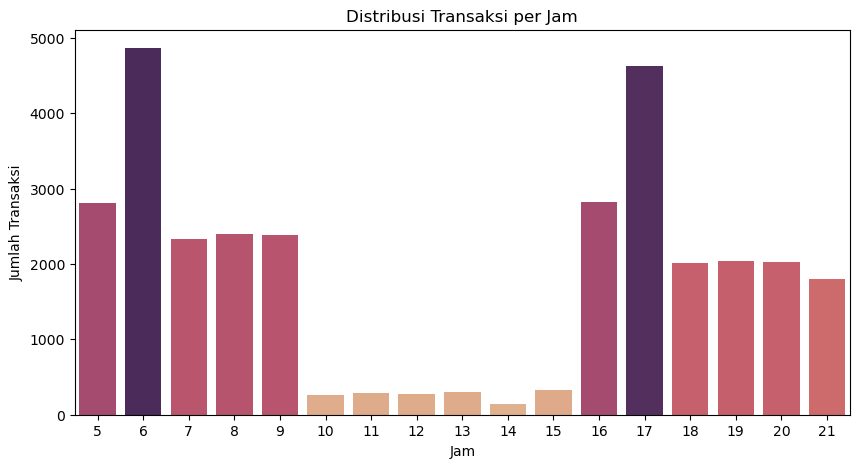

In [ ]:
# Menambahkan Kolom Jam
data['hour'] = data['tapInTime'].dt.hour

# Menghitung Jumlah Transaksi Berdasarkan Jam
hourly = data['hour'].value_counts().sort_index()

# Normalisasi Data Untuk Skala Warna
norm = (hourly - hourly.min()) / (hourly.max() - hourly.min() + 1e-9)

# Assign Color Untuk Warna Gelap = Transaksi Tinggi, Terang = Transaksi Rendah
palette = sns.color_palette("flare", n_colors=256)
colors = [palette[int(v*255)] for v in norm.values]

plt.figure(figsize=(10,5))
sns.barplot(x=hourly.index, y=hourly.values, palette=colors)
plt.title("Distribusi Transaksi per Jam")
plt.xlabel("Jam"); plt.ylabel("Jumlah Transaksi")
plt.show()

Setelah melihat distribusi transaksi berdasarkan hari, analisis diperluas dengan meninjau pola transaksi per jam. Berdasarkan diagram Distribusi Transaksi per Jam, terlihat adanya dua puncak utama aktivitas penumpang. Puncak pertama terjadi pada pukul 06.00 pagi dengan jumlah transaksi mendekati 4.900 transaksi, yang mencerminkan lonjakan mobilitas masyarakat pada jam berangkat kerja dan sekolah. Puncak kedua muncul pada pukul 17.00 sore dengan sekitar 4.700 transaksi, menandakan jam pulang kerja dan aktivitas masyarakat kembali ke rumah.

Di luar kedua jam sibuk tersebut, distribusi transaksi relatif lebih rendah. Pada rentang pukul 10.00 hingga 15.00, jumlah transaksi turun signifikan di bawah 500 transaksi, menandakan waktu jeda aktivitas transportasi. Sementara itu, pada malam hari mulai pukul 18.00 hingga 21.00, masih terdapat sekitar 2.000 transaksi per jam, meskipun jauh lebih rendah dibanding jam sibuk utama.

Pola ini menunjukkan bahwa penggunaan Transjakarta sangat erat kaitannya dengan mobilitas harian pekerja dan pelajar, dengan konsentrasi penggunaan tinggi di jam berangkat dan pulang kantor/sekolah, sedangkan di luar jam sibuk penggunaannya lebih terbatas.

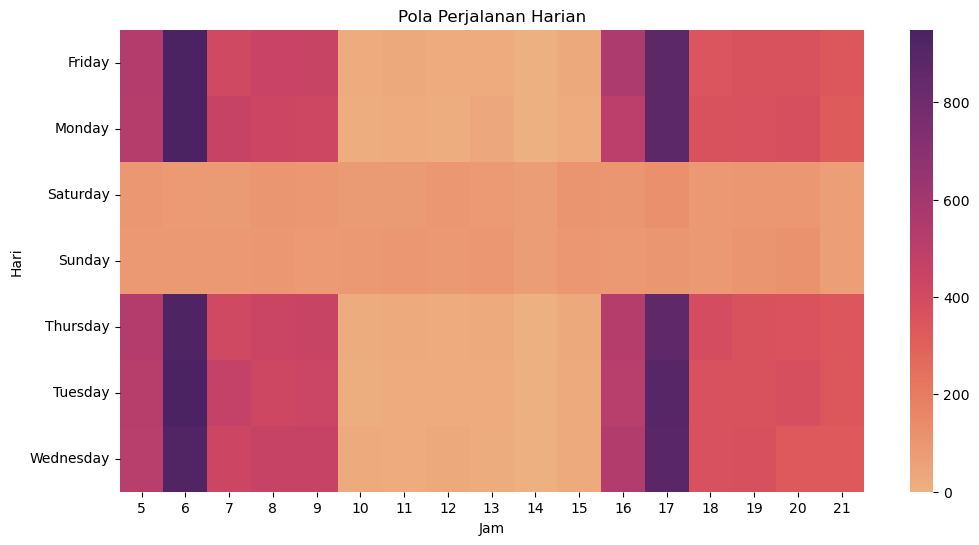

In [328]:
plt.figure(figsize=(12,6))
sns.heatmap(data.groupby(['weekday','hour']).size().unstack(fill_value=0), cmap="flare")
plt.title("Pola Perjalanan Harian")
plt.xlabel('Jam')
plt.ylabel('Hari')
plt.show()

Untuk memperdalam pemahaman mengenai pola aktivitas penumpang, visualisasi dilanjutkan menggunakan heatmap yang memperlihatkan distribusi transaksi berdasarkan kombinasi hari dan jam. Dari heatmap Pola Perjalanan Harian, terlihat dengan jelas bahwa jam sibuk utama konsisten terjadi pada pukul 06.00 pagi dan 17.00 sore pada hari kerja (Senin–Jumat). Intensitas transaksi pada jam tersebut jauh lebih tinggi dibandingkan jam-jam lainnya, mencerminkan mobilitas pekerja dan pelajar yang menggunakan Transjakarta sebagai moda transportasi utama.

Sebaliknya, pada akhir pekan (Sabtu dan Minggu), pola perjalanan terlihat lebih merata tanpa puncak signifikan. Aktivitas perjalanan cenderung lebih rendah secara keseluruhan, dengan tidak adanya lonjakan besar di pagi maupun sore hari. Hal ini menunjukkan bahwa penggunaan Transjakarta di akhir pekan lebih dipengaruhi oleh aktivitas rekreasi atau perjalanan non-rutin, dibandingkan dengan mobilitas produktif seperti pada hari kerja.

***Rute* : Jalur atau koridor manakah yang memiliki volume transaksi tertinggi dan terendah?**

Selanjutnya, untuk memahami lebih dalam mengenai pola mobilitas pengguna Transjakarta, perlu dilakukan analisis terhadap distribusi volume transaksi pada setiap koridor. Analisis ini divisualisasikan dalam bentuk bar chart berikut untuk memperlihatkan perbandingan volume transaksi antar koridor secara lebih jelas:

,corridorName,totalTransaction
0,Cibubur - Balai Kota,362
1,Ciputat - CSW,350
2,Harmoni - Jakarta International Stadium,313


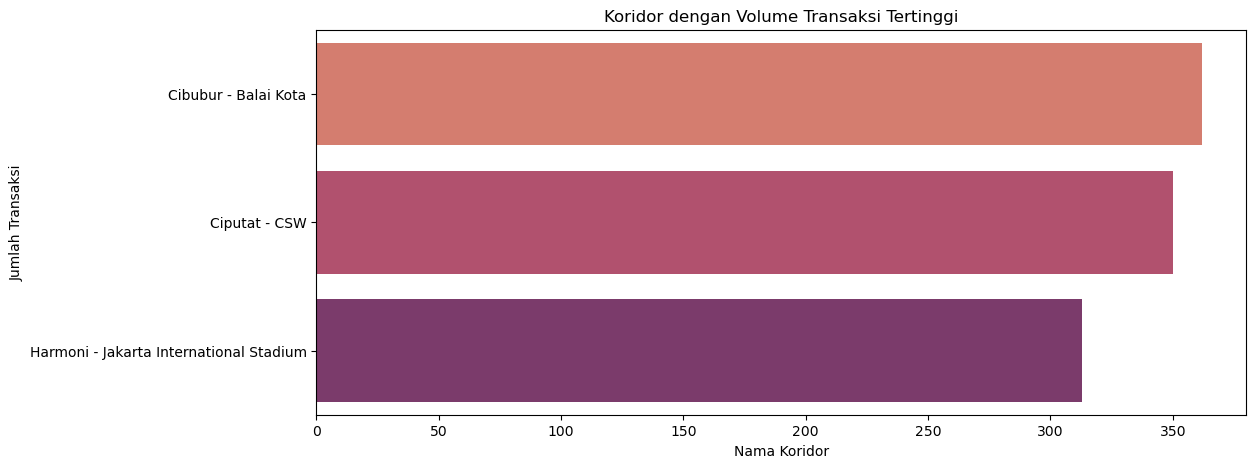

In [321]:
corridor = data['corridorName'].value_counts().reset_index(name='totalTransaction').sort_values('totalTransaction', ascending=False)
top_corridor = corridor.head(3)

display(top_corridor)

plt.figure(figsize=(12,5))
sns.barplot(data=top_corridor, x='totalTransaction', y='corridorName', hue='corridorName', palette='flare')
plt.title("Koridor dengan Volume Transaksi Tertinggi")
plt.xlabel('Nama Koridor')
plt.ylabel('Jumlah Transaksi')
plt.show()

Berdasarkan bar chart di atas, dapat dilihat bahwa top 3 koridor yang memiliki volume transaksi tertinggi berada di atas 300 transaksi yang dipimpin oleh **Cibubur - Balai Kota** dengan total transaksi sebesar 362 transaksi, kemudian diikuti oleh **Ciputat - CSW** dan **Harmoni - Jakarta International Stadium** sebesar 350 dan 313 total transaksi.

,corridorName,totalTransaction
210,Kampung Rambutan - Blok M,16
209,Tanah Abang - Kebayoran Lama via Pos Pengumben,21
208,Term. Pulo Gadung - Lampiri,28


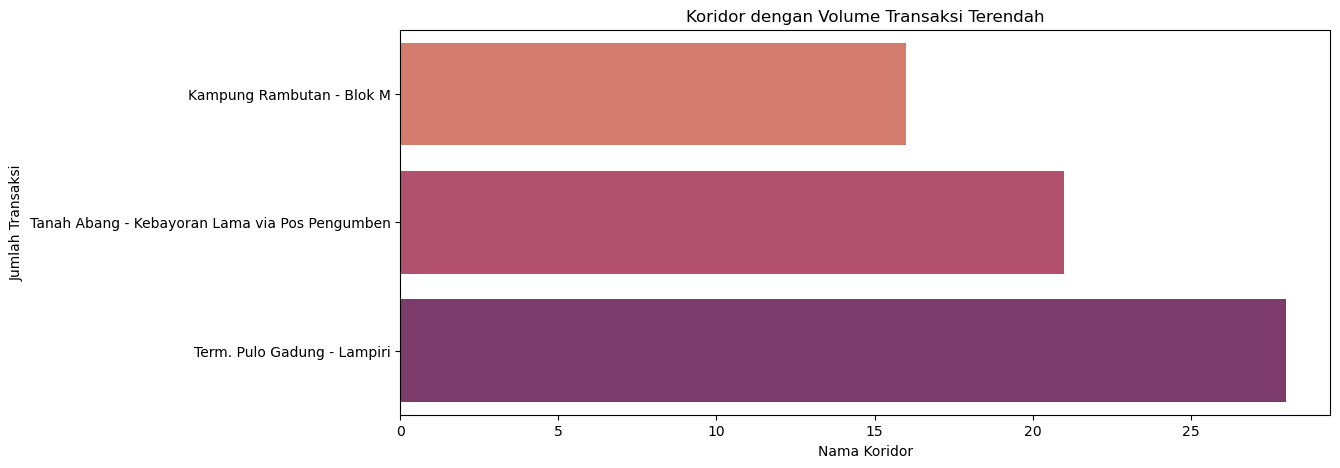

In [322]:
low_corridor = corridor.sort_values('totalTransaction', ascending=True).head(3)

display(low_corridor)

plt.figure(figsize=(12,5))

sns.barplot(data=low_corridor, x='totalTransaction', y='corridorName',hue='corridorName', palette='flare')
plt.title("Koridor dengan Volume Transaksi Terendah")
plt.xlabel('Nama Koridor')
plt.ylabel('Jumlah Transaksi')
plt.show()

Sementara itu, pada koridor dengan volume transaksi terendah memiliki jumlah transaksi di bawah 30 dengan koridor **Kampung Rambutan – Blok M** yang menempati posisi paling rendah dengan total transaksi hanya 16 transaksi. Koridor lain yang juga mencatat volume rendah adalah **Tanah Abang – Kebayoran Lama via Pos Pengumben** 21 transaksi dan **Terminal Pulo Gadung – Lampiri** 28 transaksi.

### **Kesimpulan**

Berdasarkan hasil analisis terhadap profil pengguna, pola transaksi terhadap waktu, serta volume transaksi berdasarkan koridor, dapat disimpulkan bahwa:
- Pengguna Transjakarta didominasi oleh pengguna dengan gender **Perempuan** 53,4% yang tidak jauh dari pengguna **Laki-laki** sebesar 46,6%. Hal ini menunjukkan bahwa Transjakarta relatif lebih banyak digunakan oleh perempuan dibanding laki-laki. Kecenderungan ini bisa mengindikasikan bahwa layanan Transjakarta menjadi moda transportasi yang cukup dipercaya oleh perempuan, baik untuk aktivitas harian seperti bekerja maupun aktivitas sosial.
- Mayoritas pengguna Transjakarta berusia sekitar **20-40 tahun**, yang artinya pengguna Transjakarta didominasi oleh kelompok produktif dengan kontribusi yang sangat siginifikan dan jumlah kecil lansia.
- Transaksi paling padat terjadi pada hari kerja di jam sibuk yaitu pada pukul **06.00** dan **17.00**, sedangkan pada jam **10.00** hingga **15.00**, terutama pada akhir pekan cenderung pengguna Transjakarta menurun jauh lebih rendah.
- Koridor **Cibubur – Balai Kota** (362 transaksi) dan **Ciputat – CSW** (350 transaksi) merupakan koridor dengan volume transaksi tertinggi, sedangkan **Kampung Rambutan – Blok M** (16 transaksi) menjadi koridor dengan volume transaksi paling rendah. Hal ini menunjukkan adanya perbedaan signifikan dalam distribusi penggunaan antar koridor.

### **Rekomendasi**

Guna membantu pemerintah dalam mengambil keputusan mengenai kebijakan penggunaan Transjakarta sebagai transportasi publik yang lebih efektif dan berkelanjutan, maka beberapa rekomendasi yang dapat diberikan berdasarkan hasil analisa ini adalah
- Meningkatkan keamanan dengan memperkuat kehadiran petugas keamanan, CCTV, dan penerangan utama di halte serta bus malam hari.
- Menyediakan fasilitas ramah perempuan untuk meningkatkan rasa aman dan nyaman bagi pengguna perempuan, misalnya dengan menyediakan area khusus perempuan.
- Melakukan pengembangan layanan dengan menyediakan fasilitas pendukung untuk mobilitas pekerja dan pelajar sebagai target utama karena merupakan pengguna dominan Transjakarta.
- Tetap memperhatikan aksesibilitas bagi kelompok lansia seperti penyediaan fasilitas halte/armada yang juga ramah bagi semua kelompok usia guna
- Melakukan pengelolaan yang kuat terhadap armada berdasarkan waktu dengan menambah jumlah bus pada jam sibuk (pukul **06.00** dan **17.00**) di hari kerja, serta mengurangi frekuensi pada jam non-sibuk dan akhir pekan untuk efisiensi.
- Memprioritaskan layanan dengan koridor yang memiliki volume transaksi tertinggi seperti **Cibubur - Balai Kota** dan **Ciputat - CSW** dengan melakukan penambahan armada serta meningkatkan frekuensi operasional terutama pada jam sibuk.
- Melakukan penyesuaian kapasitas layanan pada koridor dengan volume transaksi rendah dengan melakukan pengaturan jadwal keberangkatan dan jumlah armada, serta melakukan evaluasi integrasi rute dengan koridor utama agar lebih efisien.